In [265]:
from scipy import stats
import numpy as np
import random
from matplotlib import pyplot as plt

def mystatistics1(*data):
    return (np.mean(data[0]) - np.mean(data[1]))

def mystatistics2(*data):
    return abs(np.mean(data[0]) - np.mean(data[1]))

## Estimating the data from Amazon histogram

In [211]:
np.array([.63,.18,.07,.05,.07])*257

array([161.91,  46.26,  17.99,  12.85,  17.99])

In [212]:
black = [5]*162 + [4]*46 + [3]*18 + [2]*13 + [1]*18; len(black)

257

In [213]:
np.array([.55,.16,.13,.07,.1])*114

array([62.7 , 18.24, 14.82,  7.98, 11.4 ])

In [214]:
blue = [5]*63 + [4]*18 + [3]*15 + [2]*8 + [1]*11; len(blue)

115

## Running the permutation test with 1- and 2-sided version

In [233]:
stats.permutation_test([black, blue], statistic=mystatistics1)

PermutationTestResult(statistic=0.2577228895279986, pvalue=0.0764, null_distribution=array([-0.03177127,  0.45911013,  0.09409575, ..., -0.00659787,
        0.11926916, -0.22057182]))

In [235]:
stats.permutation_test([black, blue], statistic=mystatistics2)

PermutationTestResult(statistic=0.2577228895279986, pvalue=0.1408, null_distribution=array([0.01857554, 0.1450516 , 0.47169684, ..., 0.08150905, 0.16961597,
       0.08211808]))

## Fake data: what if we 2x the group of customers who bought blue?

Assuming the same percentages of each mark.

In [218]:
stats.permutation_test([black, blue+blue], statistic=mystatistics2)

PermutationTestResult(statistic=0.2577228895279986, pvalue=0.0548, null_distribution=array([0.08470648, 0.01879547, 0.20005075, ..., 0.05535442, 0.15885637,
       0.12126544]))

## Fake data: what if we take random subgroup of customers who bought black?

Random sample => should have approax. the same average.

In [219]:
small_black = random.sample(black, k=115)
np.mean(black),np.mean(small_black)

(4.249027237354086, 4.252173913043478)

In [220]:
stats.permutation_test([small_black, blue], statistic=mystatistics2)

PermutationTestResult(statistic=0.26086956521739113, pvalue=0.2962, null_distribution=array([0.12173913, 0.22608696, 0.08695652, ..., 0.15652174, 0.20869565,
       0.36521739]))

# 11.1 -- Wilcoxon test

In [55]:
stats.wilcoxon([1,3,4,-2])

WilcoxonResult(statistic=2.0, pvalue=0.375)

In [56]:
stats.wilcoxon([1,3,4,-2], alternative="greater")

WilcoxonResult(statistic=8.0, pvalue=0.1875)

In [57]:
stats.wilcoxon([1,3,4,-2], alternative="less")

WilcoxonResult(statistic=8.0, pvalue=0.875)

In [145]:
stats.wilcoxon([1,-2,3,4,5,6,7])

WilcoxonResult(statistic=2.0, pvalue=0.046875)

In [49]:
stats.wilcoxon([-1,3,4,2])

WilcoxonResult(statistic=1.0, pvalue=0.25)

In [50]:
stats.wilcoxon([1,3,4,-2])

WilcoxonResult(statistic=2.0, pvalue=0.375)

In [51]:
stats.wilcoxon([1,-3,4,2])

WilcoxonResult(statistic=3.0, pvalue=0.625)

In [21]:
stats.wilcoxon([1,3,-4,2])

WilcoxonResult(statistic=4.0, pvalue=0.875)

In [54]:
stats.wilcoxon([1,-3,4,-2])

WilcoxonResult(statistic=5.0, pvalue=1.0)

# 11.1 -- Sign-test

In [137]:
stats.binom.cdf(1,4,p=.5)*2

0.625

In [146]:
stats.binomtest(2,4,p=.5, alternative='two-sided')

BinomTestResult(k=2, n=4, alternative='two-sided', statistic=0.5, pvalue=1.0)

In [138]:
stats.binomtest(3,4,p=.5, alternative='two-sided')

BinomTestResult(k=3, n=4, alternative='two-sided', statistic=0.75, pvalue=0.625)

In [42]:
stats.binomtest(4,4,p=.5)

BinomTestResult(k=4, n=4, alternative='two-sided', statistic=1.0, pvalue=0.125)

In [32]:
5/16.

0.3125

In [40]:
stats.binomtest(3,4, alternative='greater')

BinomTestResult(k=3, n=4, alternative='greater', statistic=0.75, pvalue=0.3125)

In [41]:
stats.binomtest(4,4, alternative='greater')

BinomTestResult(k=4, n=4, alternative='greater', statistic=1.0, pvalue=0.0625)

In [140]:
1/16.

0.0625

In [139]:
stats.binomtest(3,4, alternative='less')

BinomTestResult(k=3, n=4, alternative='less', statistic=0.75, pvalue=0.9375)

# 11.2

In [160]:
import numpy as np

In [161]:
with_sample_problems = np.array([591, 621, 683, 579, 451, 680, 691, 769, 563, 575])
without_sample_problems = np.array([509, 540, 688, 502, 424, 683, 568, 748, 530, 524])

In [162]:
print(with_sample_problems-without_sample_problems)

[ 82  81  -5  77  27  -3 123  21  33  51]


In [165]:
stats.wilcoxon(with_sample_problems, without_sample_problems, alternative='less')

WilcoxonResult(statistic=52.0, pvalue=0.9970703125)

In [111]:
stats.wilcoxon(with_sample_problems-without_sample_problems, alternative='greater')

WilcoxonResult(statistic=52.0, pvalue=0.0048828125)

In [75]:
np.size(with_sample_problems)

10

In [112]:
np.mean(with_sample_problems), np.mean(without_sample_problems)

(620.3, 571.6)

In [166]:
stats.wilcoxon(with_sample_problems, without_sample_problems+20, alternative='greater')

WilcoxonResult(statistic=46.0, pvalue=0.0322265625)

In [167]:
stats.wilcoxon(with_sample_problems-without_sample_problems-20, alternative='less')

WilcoxonResult(statistic=46.0, pvalue=0.9755859375)

In [156]:
stats.wilcoxon(with_sample_problems-without_sample_problems-50, alternative='less')

WilcoxonResult(statistic=28.0, pvalue=0.5390625)

In [157]:
with_sample_problems-without_sample_problems-50

array([ 32,  31, -55,  27, -23, -53,  73, -29, -17,   1])

In [115]:
with_sample_problems-without_sample_problems>=20

array([ True,  True, False,  True,  True, False,  True,  True,  True,
        True])

In [159]:
np.sum(with_sample_problems-without_sample_problems>=20)

8

In [117]:
stats.binomtest(8, 10, alternative='greater')

BinomTestResult(k=8, n=10, alternative='greater', statistic=0.8, pvalue=0.0546875)

In [148]:
X = list(with_sample_problems)
Y = list(without_sample_problems+20)

In [169]:
X

[591, 621, 683, 579, 451, 680, 691, 769, 563, 575]

In [170]:
Y

[529, 560, 708, 522, 444, 703, 588, 768, 550, 544]

In [168]:
stats.permutation_test([X,Y],  statistic=mystatistics)

PermutationTestResult(statistic=28.699999999999932, pvalue=0.4906, null_distribution=array([ 39.1,   0.7,  -5.5, ..., -95.9,  -5.3,  38.9]))

In [171]:
stats.permutation_test([X*8,Y*8],  statistic=mystatistics)

PermutationTestResult(statistic=28.699999999999932, pvalue=0.0538, null_distribution=array([-14.175,  -0.675,  14.825, ...,  18.95 ,   0.775,  22.4  ]))

# 11.3/12.3 -- Waiting times

In [303]:
times = np.array([17, 15, 20, 20, 32, 28, 12, 26, 25, 25, 35, 24])

(array([1., 1., 1., 2., 0., 3., 2., 0., 1., 1.]),
 array([12. , 14.3, 16.6, 18.9, 21.2, 23.5, 25.8, 28.1, 30.4, 32.7, 35. ]),
 <BarContainer object of 10 artists>)

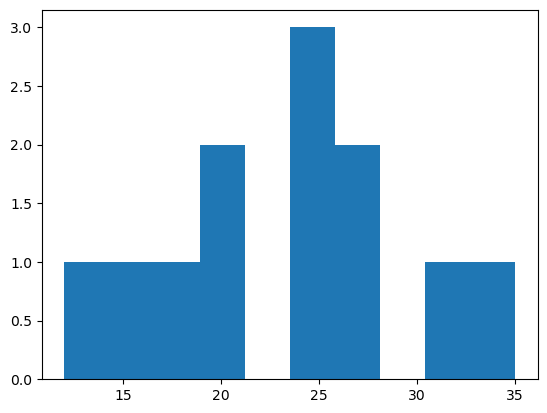

In [304]:
plt.hist(times)

In [305]:
times.size

12

In [306]:
np.mean(times), np.median(times)

(23.25, 24.5)

In [299]:
np.sum(times<20), np.sum(times>20)

(3, 7)

In [409]:
stats.binomtest(7,10,.5, alternative='greater')

BinomTestResult(k=7, n=10, alternative='greater', statistic=0.7, pvalue=0.171875)

In [384]:
stats.binomtest(70,100,.5, alternative='greater')

BinomTestResult(k=70, n=100, alternative='greater', statistic=0.7, pvalue=3.925069822796835e-05)

In [382]:
stats.wilcoxon(times-20, alternative='greater')

WilcoxonResult(statistic=42.5, pvalue=0.0625234400655502)

# Wilcoxon fails terribly for Exp distribution

H_0: We have data from Exp(3) distribution. 

We generate our own data, thus this really is true. We will sample the type-I error.

In [388]:
expdata = stats.expon.rvs(scale=3, size=100)

(array([41., 24., 13., 11.,  3.,  3.,  3.,  0.,  0.,  2.]),
 array([ 0.06338363,  1.42545899,  2.78753436,  4.14960972,  5.51168508,
         6.87376045,  8.23583581,  9.59791117, 10.95998654, 12.3220619 ,
        13.68413726]),
 <BarContainer object of 10 artists>)

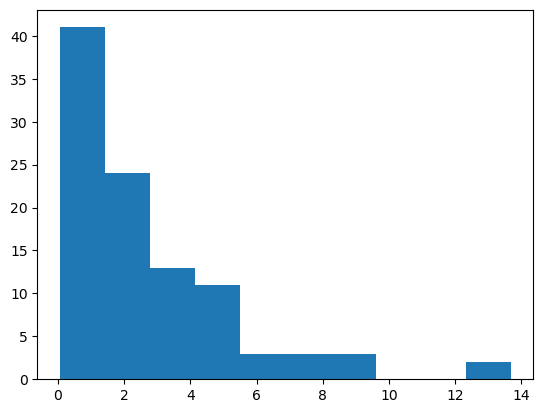

In [386]:
plt.hist(expdata)

(array([28., 25., 19., 12.,  7.,  4.,  2.,  1.,  1.,  1.]),
 array([ 0.04347253,  1.3051205 ,  2.56676847,  3.82841643,  5.0900644 ,
         6.35171236,  7.61336033,  8.8750083 , 10.13665626, 11.39830423,
        12.65995219]),
 <BarContainer object of 10 artists>)

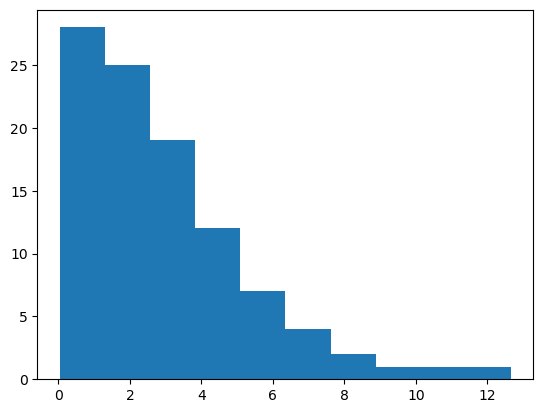

In [370]:
plt.hist(expdata)

In [389]:
np.median(expdata), np.mean(expdata)

(2.1125229336199345, 2.818046296052764)

In [387]:
stats.expon.median(scale=3), stats.expon.mean(scale=3)

(2.0794415416798357, 3.0)

In [396]:
expdata = stats.expon.rvs(scale=3, size=100)
stats.wilcoxon(expdata-2.079).pvalue

0.3055421446183436

In [400]:
L = np.array([stats.wilcoxon(stats.expon.rvs(scale=3, size=100)-2.079).pvalue for _ in range(100)])

In [410]:
def signtest(L):
    neg = np.sum(L<0)
    pos = np.sum(L>0)
    return stats.binomtest(pos,neg+pos,.5)

In [415]:
L2 = np.array([signtest(stats.expon.rvs(scale=3, size=100)-2.079).pvalue for _ in range(100)])

(array([ 7.,  8.,  9., 11., 11.,  0., 12., 14.,  0., 28.]),
 array([0.0352002 , 0.13168018, 0.22816016, 0.32464014, 0.42112012,
        0.5176001 , 0.61408008, 0.71056006, 0.80704004, 0.90352002,
        1.        ]),
 <BarContainer object of 10 artists>)

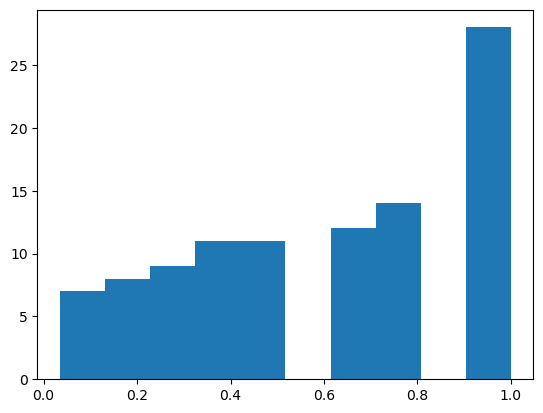

In [416]:
plt.hist(L2)

In [417]:
np.mean(L2<.05)

0.02

In [255]:
a = np.array([531, 621, 663, 579, 451, 660, 591, 719, 543, 575])
b = np.array([509, 540, 688, 502, 424, 683, 568, 748, 530, 524])

In [176]:
a.mean(), b.mean()

(593.3, 571.6)

In [179]:
np.sum(a-b>=50)

3

In [180]:
stats.binomtest(3,10,.5,alternative='less')

BinomTestResult(k=3, n=10, alternative='less', statistic=0.3, pvalue=0.171875)